### <center>Muhammad Rizki Assamsuli</center>
#### <center>F1D022146</center>

# Memperbaiki kualitas citra dari gambar

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Script di atas merupakan pemanggilan library yang akan digunakan untuk pengolahan citra.

Script di bawah merupakan sebuah script untuk menampilkan citra asli, lalu dikonversi menjadi grayscale.

[[253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]
 ...
 [253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]]


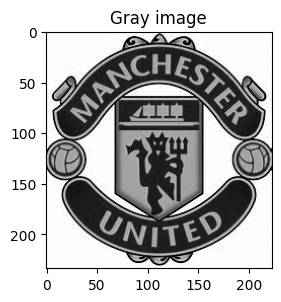

In [6]:
muOri = plt.imread('manchester_united.jpeg') 
muGray = cv2.cvtColor(muOri, cv2.COLOR_BGR2GRAY) 
plt.subplot(122)
plt.title("Gray image")
plt.imshow(muGray, cmap='gray') 
print(muGray)

###  mean filtering

In [7]:
kernel_3 = np.full((3,3), 1/9)
kernel_9 = np.full((9,9), 1/81) 

Script di atas digunakan untuk membuat kernel full satu angka yang akan digunakan di dalam proses filtrasi menggunakan fungsi "full". Pada fungsi "full" akan menggunakan parameter berupa matriks kernelnya dan bilangan yang akan mengisinya

In [8]:
def filterMean(image, kernel):
    heightImage, widthImage = image.shape 
    heightKernel, widthKernel = kernel.shape 
    heigthCenter = int((heightKernel - 1)/2) 
    widthCenter = int((widthKernel - 1)/2) 

    leftPad = widthCenter
    rightPad = widthKernel - widthCenter
    topPad = heigthCenter
    botPad = heightKernel - heigthCenter
    image = np.pad(image, ((leftPad, rightPad), (topPad, botPad)), mode='edge')

    result = np.zeros([heightImage, widthImage]) 
    # proses konvolusi
    for i in range(heightImage):
         for j in range(widthImage):
             helper = 0
             for k in range(heightKernel):
                 for l in range(widthKernel):
                     helper += image[i+k, j+l] * kernel[k, l]
             result[i, j] = helper 
    return result 

Script diatas merupakan fungsi filter yang akan digunakan untuk memfiltrasi dengan mean filtering. Pada perulangan di atas, setiap piksel pada citra diambil, dan kernel ditempatkan di sekitarnya. Setiap elemen citra dihubungkan dengan elemen kernel yang sesuai dan dikalikan. Hasil perkalian tersebut ditambahkan ke variabel helper. Setelah selesai mengalikan dan menjumlahkan, nilai helper disimpan di lokasi piksel yang sesuai dalam matriks result. Pada fungsi ini akan langsung otomatis menambahkan padding ke dalam citra untuk membantu proses konvolusi yang akan berjalan untuk proses mencari mean dari piksel-piksel sesuai kernel yang akan digunakan. untuk mean filtering tidak ada bedanya dengan proses konvolusi biasa hanya saja yang membedakan kernel yang akan dipakai.

In [9]:
mean_3 = filterMean(muGray, kernel_3)
mean_9 = filterMean(muGray, kernel_9)

Script diatas mendeklarasikan variabel mean_3, dan mean_9 dan langsung diisi dengan fungsi filter dengan parameter citra gray dan kernel masing-masing sesuai matriksnya (kernel_3, dan kernel_9) 

Script di bawah merupakan sebuah script untuk menampilkan 2 citra yang sudah melalui proses Mean filter dengan menggunakan kernel 3x3 dan 9 x 9.

(-0.5, 222.5, 233.5, -0.5)

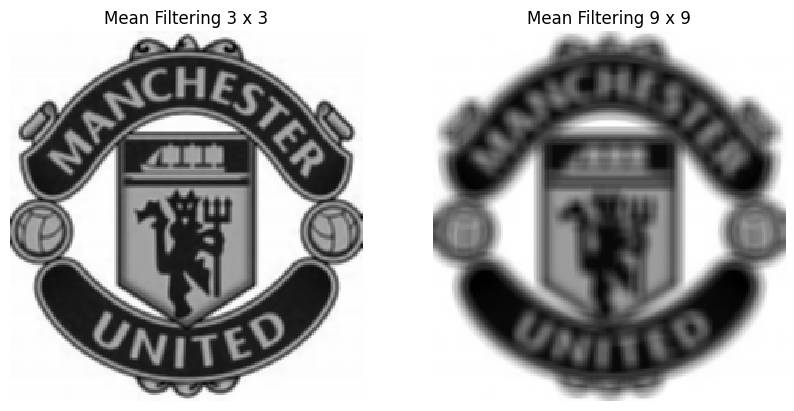

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].set_title('Mean Filtering 3 x 3')
ax[0].imshow(mean_3, cmap='gray', interpolation='nearest')
ax[0].axis('off')  # menyembunyikan sumbu
ax[1].set_title('Mean Filtering 9 x 9')
ax[1].imshow(mean_9, cmap='gray', interpolation='nearest')
ax[1].axis('off')  # menyembunyikan sumbu


###  Modus Filtering

In [11]:
def modus(arr):
    count = {}
    for num in arr:
        if num in count:
            count[num] += 1
        else:
            count[num] = 1
            
          
    max_count = 0
    modus = None
    for num, value in count.items():
        if value > max_count:
            max_count = value
            modus = num
    return modus 

Script di atas merupakan fungsi modus() yang digunakan untuk mencari modus (angka dengan frekuensi terbanyak) pada data array. Pencarian nilai modus ini dilakukan dengan cara memanfaatkan fungsi lopping yang akan terus menambah angka pada variabel count jika data array memiliki nilai piksel yang sama.

In [12]:
def filterModus(image, kernel):
    heightImage, widthImage = image.shape
    heightKernel, widthKernel = kernel.shape 
    heigthCenter = int((heightKernel - 1)/2) 
    widthCenter = int((widthKernel - 1)/2) 

    leftPad = widthCenter
    rightPad = (widthKernel-1) - widthCenter
    topPad = heigthCenter
    botPad = (heightKernel-1) - heigthCenter
    image = np.pad(image, ((leftPad, rightPad), (topPad, botPad)), mode='edge')

    result = np.zeros([heightImage, widthImage]) 
    for i in range(heightImage):
         for j in range(widthImage):
             temp = np.zeros(len(kernel)*len(kernel))
             indeks = 0
             for k in range(heightKernel):
                 for l in range(widthKernel):
                     temp[indeks] += image[i+k,j+l]
                     indeks+=1
                     result[i,j] = modus(temp)
             
    return result 

Script diatas merupakan fungsi filter yang akan digunakan untuk memfiltrasi dengan modus filtering. Pada fungsi ini akan langsung otomatis menambahkan padding ke dalam citra untuk membantu proses konvolusi yang akan berjalan untuk proses peletakan modus dari data yang diambil dari piksel-piksel sesuai kernel yang akan digunakan. Untuk proses pencarian modus ada hanya dengan memanggil fungsi modus pada fungsi ini.

In [13]:
modus_3 = filterModus(muGray, kernel_3)
modus_9 = filterModus(muGray, kernel_9)

Code diatas mendeklarasikan variabel modus_3, dan mosud_9  dan langsung diisi dengan fungsi filter dengan parameter citra gray dan kernel masing-masing sesuai matriksnya (kernel_3 dan kernel_9) 

Script di bawah merupakan sebuah script untuk menampilkan 2 citra yang sudah melalui proses Modus filter dengan menggunakan kernel 3x3dan 9x9.

(-0.5, 222.5, 233.5, -0.5)

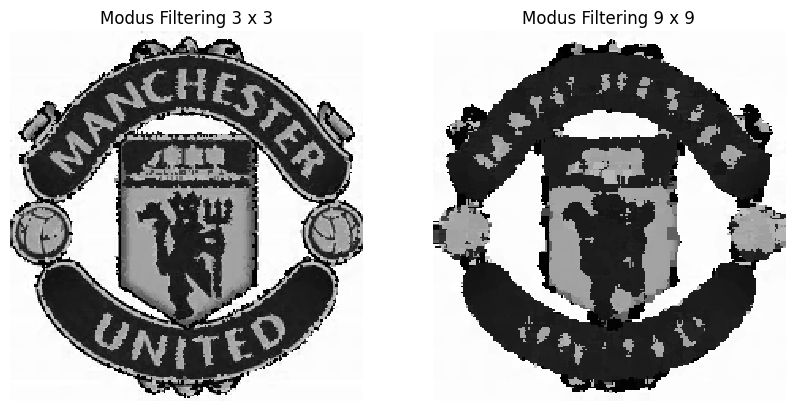

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].set_title('Modus Filtering 3 x 3')
ax[0].imshow(modus_3, cmap='gray', interpolation='nearest')
ax[0].axis('off')  # menyembunyikan sumbu
ax[1].set_title('Modus Filtering 9 x 9')
ax[1].imshow(modus_9, cmap='gray', interpolation='nearest')
ax[1].axis('off')  # menyembunyikan sumbu


###  Median Filtering 

In [15]:
def median(arr):
    n = len(arr) 
    sorted_arr = sorted(arr)
    if n % 2 == 0:
        median1 = sorted_arr[n//2]
        median2 = sorted_arr[n//2 - 1]
        median = (median1 + median2)/2
    else:
        median = sorted_arr[n//2]
    return median 

Script di atas merupakan fungsi median digunakan untuk mencari nilai tengah pada citra yang telah dibagi oleh kernel. Sebelum mencari nilai tengah diperlukan fungsi sorted untuk mengurutkan data pada array yang akan dipakai.

In [16]:
def filterMedian(image, kernel):
    heightImage, widthImage = image.shape
    heightKernel, widthKernel = kernel.shape
    heigthCenter = int((heightKernel - 1)/2)
    widthCenter = int((widthKernel - 1)/2)

    leftPad = widthCenter
    rightPad = widthKernel - widthCenter
    topPad = heigthCenter
    botPad = heightKernel - heigthCenter
    image = np.pad(image, ((leftPad, rightPad), (topPad, botPad)), mode='edge')

    result = np.zeros([heightImage, widthImage])
    for i in range(heightImage):
         for j in range(widthImage):
             temp = np.zeros(len(kernel)*len(kernel))
             indeks = 0
             for k in range(heightKernel):
                 for l in range(widthKernel):
                     temp[indeks] += image[i+k,j+l]
                     indeks+=1
                     result[i,j] = median(temp)
             
    return result

Script diatas merupakan fungsi filter yang akan digunakan untuk memfiltrasi dengan median filtering. Pada perulangan diatas, setiap piksel pada citra diambil, dan kernel ditempatkan di sekitarnya. Setiap elemen citra dihubungkan dengan elemen kernel yang sesuai dan hasilnya ditambahkan ke array temp. Setelah loop kernel selesai, array temp dikirim ke fungsi median() untuk menghitung nilai median, dan nilai median tersebut disimpan di lokasi piksel yang sesuai dalam matriks result.
Pada fungsi ini akan langsung otomatis menambahkan padding ke dalam citra untuk membantu proses konvolusi yang akan berjalan untuk proses peletakan median dari data yang diambil dari piksel piksel sesuai kernel yang akan digunakan. Untuk proses pencarian median ada hanya dengan memanggil fungsi median() pada fungsi ini.

In [17]:
median_3 = filterMedian(muGray, kernel_3)
median_9 = filterMedian(muGray, kernel_9)

Script diatas mendeklarasikan variabel median_3dan median_9 dan langsung diisi dengan fungsi filter dengan parameter citra gray dan kernel masing-masing sesuai matriksnya (kernel_3, dan kernel_9) 

Script di bawah merupakan sebuah script untuk menampilkan 2 citra yang sudah melalui proses Median filter dengan menggunakan kernel 3x3, dan 9x9.

(-0.5, 222.5, 233.5, -0.5)

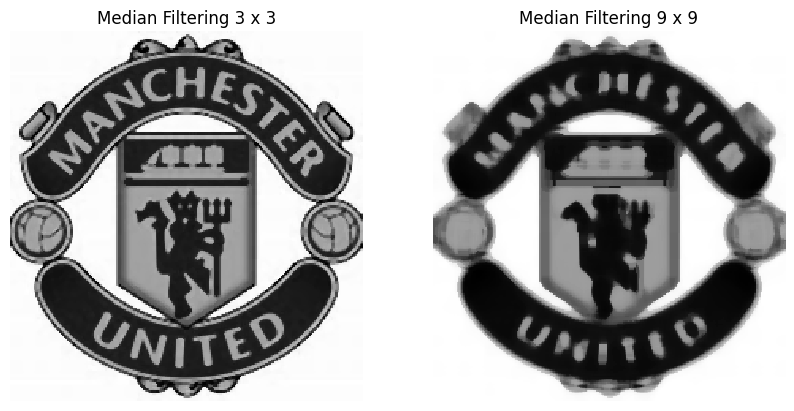

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].set_title('Median Filtering 3 x 3')
ax[0].imshow(median_3, cmap='gray', interpolation='nearest')
ax[0].axis('off')  # menyembunyikan sumbu
ax[1].set_title('Median Filtering 9 x 9')
ax[1].imshow(median_9, cmap='gray', interpolation='nearest')
ax[1].axis('off')  # menyembunyikan sumbu


### Smoothing & Sharpening

In [19]:
def smoothing(image):
    kernel = np.array([[1/10, 1/10, 1/10],
                       [1/10, 1/5, 1/10],
                       [1/10, 1/10, 1/10]])
    smoothed_image = cv2.filter2D(image, -1, kernel)
    
    return smoothed_image


Script di atas untuk menerapkan filter perataan pada gambar input menggunakan sebuah kernel yang telah ditentukan sebelumnya. Kernel ini digunakan untuk melakukan konvolusi terhadap citra grayscale input dengan tujuan untuk menghaluskan gambar. Kernel yang digunakan adalah matriks 3x3 yang terdiri dari angka-angka yang telah ditentukan sebelumnya. Proses konvolusi dilakukan menggunakan fungsi filter2D dari OpenCV. Hasil gambar yang telah dihaluskan kemudian dikembalikan sebagai output dari fungsi ini.

In [42]:

def sharpening(image):
    kernel = np.array([[1/9, 1/9, 1/9],
                       [1/9, 8/9, 1/9],
                       [1/9, 1/9, 1/9]])
    sharpened_image = cv2.filter2D(image, -1, kernel)
    
    return sharpened_image

Script di atas untuk meningkatkan ketajaman gambar yang diinput dengan menerapkan filter ketajaman menggunakan kernel yang telah ditentukan sebelumnya. Proses ini bertujuan untuk membuat detail-detail yang ada pada gambar menjadi lebih tajam dan jelas. Kernel yang digunakan terdiri dari matriks 3x3 dengan bobot tertentu untuk setiap elemen dalam kernel. Selanjutnya, gambar tersebut akan menjalani proses konvolusi dengan menggunakan fungsi filter2D dari OpenCV. Hasil dari proses ini adalah gambar yang telah ditingkatkan ketajamannya, yang kemudian akan dikembalikan sebagai output dari fungsi ini.

In [20]:
smoothingImage = smoothing(muGray)
SharpeningImage = sharpening(muGray)

Script di atas merupakan pemanggilan untuk melakukan pemrosesan citra dengan memanggil fungsi smoothingImage dan sharpeningImage

Script di bawah merupakan sebuah script untuk menampilkan 2 citra yang sudah melalui proses Modus filter dengan menggunakan fungsi smoothing dan sharpening.

(-0.5, 222.5, 233.5, -0.5)

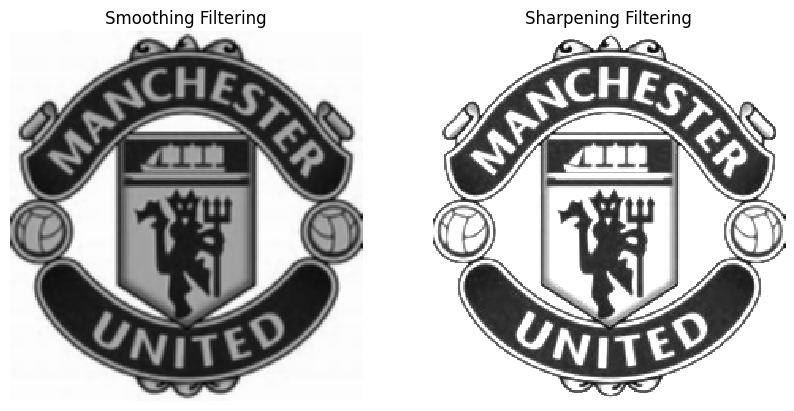

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].set_title('Smoothing Filtering')
ax[0].imshow(smoothingImage, cmap='gray', interpolation='nearest')
ax[0].axis('off')  # menyembunyikan sumbu
ax[1].set_title('Sharpening Filtering')
ax[1].imshow(SharpeningImage, cmap='gray', interpolation='nearest')
ax[1].axis('off')  # menyembunyikan sumbu


Script di bawah merupakan sebuah script untuk menampilkan seluruh citra yang sudah melalui seluruh proses sebelumnya.

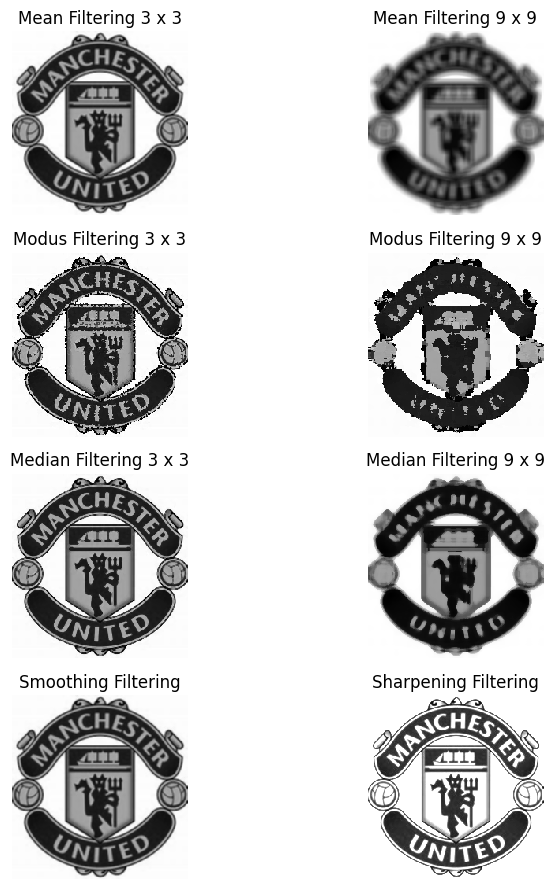

In [22]:
fig, axes = plt.subplots(4, 2, figsize=(9, 9))

# Plot Mean Filtering
axes[0, 0].set_title('Mean Filtering 3 x 3')
axes[0, 0].imshow(mean_3, cmap='gray', interpolation='nearest')
axes[0, 0].axis('off')

axes[0, 1].set_title('Mean Filtering 9 x 9')
axes[0, 1].imshow(mean_9, cmap='gray', interpolation='nearest')
axes[0, 1].axis('off')

# Plot Modus Filtering
axes[1, 0].set_title('Modus Filtering 3 x 3')
axes[1, 0].imshow(modus_3, cmap='gray', interpolation='nearest')
axes[1, 0].axis('off')

axes[1, 1].set_title('Modus Filtering 9 x 9')
axes[1, 1].imshow(modus_9, cmap='gray', interpolation='nearest')
axes[1, 1].axis('off')

# Plot Median Filtering
axes[2, 0].set_title('Median Filtering 3 x 3')
axes[2, 0].imshow(median_3, cmap='gray', interpolation='nearest')
axes[2, 0].axis('off')

axes[2, 1].set_title('Median Filtering 9 x 9')
axes[2, 1].imshow(median_9, cmap='gray', interpolation='nearest')
axes[2, 1].axis('off')

# Plot Smoothing Filtering
axes[3, 0].set_title('Smoothing Filtering')
axes[3, 0].imshow(smoothingImage, cmap='gray', interpolation='nearest')
axes[3, 0].axis('off')

# Plot Sharpening Filtering
axes[3, 1].set_title('Sharpening Filtering')
axes[3, 1].imshow(SharpeningImage, cmap='gray', interpolation='nearest')
axes[3, 1].axis('off')

plt.tight_layout()
plt.show()


### Melakukan Deteksi Tepi Menggunakan Metode Sobel, Prewitt, dan Roberts